In [ ]:
#import du google drive où les fichiers pour le projet sont stockés
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading and preprocessing data

First we need to convert dicom files to objects that we can use; CSV files, jpg or png images e.g. To do this, we can use pydicom library for reading dicom files and then converting them. For more information you can visit these links:

[https://asvcode.github.io/MedicalImaging/medical_imaging/dicom/fastai/2020/04/28/Medical-Imaging-Using-Fastai.html](http://)

[https://pydicom.github.io/pydicom/stable/tutorials/dataset_basics.html](http://)

In [ ]:
#installation pydicom pour lire les fichiers dicom
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 13.4 MB/s 


In [ ]:
#import des librairies
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom, cv2

#import du dataset pour l'entraînement du modèle
train_dcm_path = get_dicom_files("/content/gdrive/MyDrive/projet8/train_dcm")
#Comptage du nombre d'images dans le trainset
print("train len:", len(train_dcm_path))

train len: 1738


In [ ]:
#import images for the test set
test_dcm_path = get_dicom_files("/content/gdrive/MyDrive/projet8/test")
#check number of images for the test set
print("\ntest len:", len(test_dcm_path))


test len: 743


Now we can convert some parts of dicom file to pandas dataset. Thanks to Mr.Bombonato, he convert these dicom files to csv files you can find here:

[https://www.kaggle.com/datasets/ibombonato/unifesp-xray-body-part-dicom-metadata-csv](http://)

In [ ]:
#Lecture du fichier csv qui présente les caractéristiques de chaque image
train_dcm2csv_df = pd.read_csv('dicom_metadata_train.csv')
train_dcm2csv_df

,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,...,WindowCenter,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3
0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.71157989004260882669063657298878631277,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.32467620439025796224161045738740609166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.74856220852423198555486702707715689735,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.90865692473901867788171201500090752135,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.44687741644515558201307438644049640452,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.84195286770915865285283493888654502396,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.11211536623788107002735898165090841538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.97523800054763336883452748817549462853,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.13690494879381638155074323667482680582,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Furthermore, there's another csv file in the main dataset that includes "SOP IDs" and "targets".

In [ ]:
#Lecture du fichier csv qui rattache chaque itentifiant d'image à son ou ses labels
train_df = pd.read_csv('train.csv')
train_df

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3
...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2


In [ ]:
#exploration du type des données
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SOPInstanceUID  1738 non-null   object
 1   Target          1738 non-null   object
dtypes: object(2)
memory usage: 27.3+ KB


In [ ]:
#exploration des labels 
train_df['Target'].unique()

array(['0 ', '15 ', '12 ', '14 ', '3 ', '13 20 ', '5 ', '17 ', '2 ', '6 ',
       '9 21 ', '9 ', '16 ', '7 ', '11 ', '1 ', '20 ', '21 ', '13 ',
       '0 3 ', '8 ', '1 11 12 ', '0 15 ', '19 ', '10 ', '4 ', '11 12 ',
       '1 6 ', '10 19 ', '5 8 ', '3 15 ', '7 9 ', '15 19 ', '2 13 20 ',
       '18 ', '3 6 ', '2 20 ', '10 11 19 ', '1 12 ', '3 7 ', '8 16 '],
      dtype=object)

The labels are represented as integers that map to the following:


* Abdomen = 0
* Ankle = 1
* Cervical Spine = 2
* Chest = 3
* Clavicles = 4
* Elbow = 5
* Feet = 6
* Finger = 7
* Forearm = 8
* Hand = 9
* Hip = 10
* Knee = 11
* Lower Leg = 12
* Lumbar Spine = 13
* Others = 14
* Pelvis = 15
* Shoulder = 16
* Sinus = 17
* Skull = 18
* Thigh = 19
* Thoracic Spine = 20
* Wrist = 21

As you see, some of dicom files have more that one class (target)! So, we have a multilabel classification problem. This is my strategy:

First we add all labels to the "train_df" as new columns by their orders and set all to zero. Then by considering the numbers in the target column of each record, we replace 1 in the columns related that number. 

For example, suppose that target have two numbers: "1 , 6". These numbers represent "ankle, feet". We replace 1 in "ankle" and "feet" columns of that record.

In [ ]:
#Création d'une colonne pour chaque partie du corps
train_df['Abdomen'] = 0
train_df['Ankle'] = 0
train_df['Cervical Spine'] = 0
train_df['Chest'] = 0
train_df['Clavicles'] = 0
train_df['Elbow'] = 0
train_df['Feet'] = 0
train_df['Finger'] = 0
train_df['Forearm'] = 0
train_df['Hand'] = 0
train_df['Hip'] = 0
train_df['Knee'] = 0
train_df['Lower Leg'] = 0
train_df['Lumbar Spine'] = 0
train_df['Others'] = 0
train_df['Pelvis'] = 0
train_df['Shoulder'] = 0
train_df['Sinus'] = 0
train_df['Skull'] = 0
train_df['Thigh'] = 0
train_df['Thoracic Spine'] = 0
train_df['Wrist'] = 0
train_df

,SOPInstanceUID,Target,Abdomen,Ankle,Cervical Spine,Chest,Clavicles,Elbow,Feet,Finger,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Remplir la valeur sous chaque colonne représentant chaque partie du corps avec 1 en face de l'image représentant la partie du corps en question
labels = ['Abdomen', 'Ankle', 'Cervical Spine', 'Chest', 'Clavicles', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand', 'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Others', 'Pelvis', 'Shoulder', 'Sinus', 'Skull', 'Thigh', 'Thoracic Spine', 'Wrist']

for i in range(len(train_df)):
    lbl_list = train_df.Target[i].split()
    
    for j in lbl_list:
        train_df.loc[i, labels[int(j)]] = 1
        

train_df[:10]

,SOPInstanceUID,Target,Abdomen,Ankle,Cervical Spine,Chest,Clavicles,Elbow,Feet,Finger,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.2.826.0.1.3680043.8.498.10053755320637729867508668285241208441,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.2.826.0.1.3680043.8.498.10062189329714053601496804394945741428,14,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,1.2.826.0.1.3680043.8.498.10065930002825553435161793347987832017,13 20,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,1.2.826.0.1.3680043.8.498.10072001800484199846734151421006166369,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.2.826.0.1.3680043.8.498.10077219503857952412254959562456136784,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we merge two dataframs based on "SOPInstanceUID" columns. So we have an integrated dataframe which help us to create "X" and "y" of model much easier.

In [ ]:
#merge des deux fichiers csv avec l'identification des images comme colonne commune pour réaliser le joint
train_merged_df = pd.merge(train_dcm2csv_df, train_df, on='SOPInstanceUID')
train_merged_df

,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.71157989004260882669063657298878631277,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.32467620439025796224161045738740609166,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.74856220852423198555486702707715689735,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.90865692473901867788171201500090752135,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.44687741644515558201307438644049640452,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.84195286770915865285283493888654502396,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1734,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.11211536623788107002735898165090841538,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1735,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.97523800054763336883452748817549462853,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1736,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.13690494879381638155074323667482680582,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


An example of converting dicom file to jpg image:

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


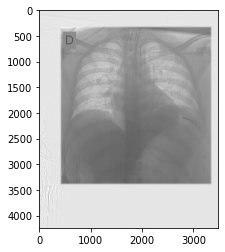

In [ ]:
#Conversion des image du format dicom au format jpeg
#choix d'une image aléatoire dans le trainset
tmp = train_dcm_path[np.random.randint(0, 1737)].dcmread()
#renvoie l'image en array contenant les données de ses pixels
dcm_img = tmp.pixel_array.astype(float)
img = np.uint8((np.maximum(dcm_img,0)/dcm_img.max())*255)
plt.imshow(img, cmap='gray')

This step is the most time consuming part of the code; 

First we should reading dicom files and convert them to jpg images but there is a big problem; The size of dicom images are too big; for example 3000 * 4000 pixels! There isn't enough memory so we should resize all of them to 128 * 128 pixels but unfortunately it will have consequences like information loss. If you have enough memory, you can resize them to 512 * 512 pixels for example. Anyway, the images create X array for training.

The "y" of model, is an array of 1738 * 22. In another words, the label of each image (each SOPInstanceUID) is a vector contains 22 binary numbers that represent 22 labels (body parts). 

In [ ]:
from matplotlib import pyplot as plt

_input_dir = './inputs/'

img_path = _input_dir + 'train_images.npy'
label_path = _input_dir + 'train_labels.npy'

try:
  X = np.load(img_path)
  y = np.load(label_path)

  assert len(X) == len(train_dcm_path), 'File is corrupted...'

  print('Files exist and not corrupted...\n')
  print(f'Arrays recovered:: X - {X.shape} \t  y - {y.shape}\n')

except:
  X = []
  y = []
  IMG_SIZE = 256

  for index in range(len(train_dcm_path)):
      dcm_arr = train_dcm_path[index].dcmread()
      
      # reading and reshape images
      image = dcm_arr.pixel_array.astype(float)
      image = np.uint8((np.maximum(image, 0) / image.max()) * 255)
      image = cv2.resize(image, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST ) / 255. #resizing and normalizing
      X.append(np.expand_dims(image, axis = -1))
      
      # label reading
      uid = str(dcm_arr['SOPInstanceUID'].value)
      y.append(np.ndarray.flatten(np.array(train_merged_df.loc[train_merged_df['SOPInstanceUID'] == uid][train_merged_df.columns[64:]])))
      if ((index + 1) % 100 == 0):
        print(f'Processed:: {index + 1} / {len(train_dcm_path)}')
      
  X = np.array(X)
  y = np.array(y)
  #save images ready for training and their labels 
  np.save('train_images.npy', X) 
  np.save('train_labels.npy', y)

  print(f'Arrays saved:: X - {X.shape} \t  y - {y.shape}')

Files exist and not corrupted...

Arrays recovered:: X - (1738, 256, 256, 1) 	  y - (1738, 22)



In [ ]:
#Standarization of image sizes
RESIZE = True

if RESIZE:
  IMG_SIZE = 128
  X_resized = []
  for img in X:
    img = (img * 255.).astype('uint8')
    img = cv2.resize(img, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST ) / 255. #resizing and normalizing
    X_resized.append(img)
  
  X = np.array(X_resized)
  X = np.expand_dims(X, axis=-1)
  del X_resized

# Training and testing custom CNN model

First we should split X and y data to train and test data.

In [ ]:
from sklearn.model_selection import train_test_split
#split trainset in the aim of get testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
del X, y

To avoid of overfitting, we can use "EarlyStopping" callback; So we need to split train data to "train" and "validation" parts.

In [ ]:
#split trainset in the aim of get validationset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


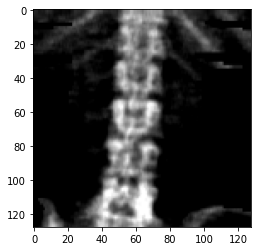

In [ ]:
#A sample of X_train and related y_train

plt.imshow(X_train[7][:, :, 0], cmap='gray')
print(y_train[7])

Now, we can build our CNN model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D

input_size = 128
n_classes = 22
#Sequential function used for add the steps and layers into the main architecture
cnn_model = Sequential()
#Input layer added
cnn_model.add(InputLayer(input_shape=(input_size, input_size, 1)))
#Number of output filters in the convolution (total feature maps)
#A tuple or integer value specifying the height and width of the 2D convolution window
#Activation function "Rectified Linear Unit" used in the aim of replace negative numbers by zéro
#takes samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor
#padding = “same” for keep output with the same size as the input             
cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
#Two times as 
cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
#max value selected from a pool of pixels in the aim of reduce the size
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))

#GlobalMaxPooling does a channel wise maxpooling rather than spatial
cnn_model.add(GlobalMaxPooling2D())
#implementation of the activation function
#Sigmoid activation function(0<value<1)
cnn_model.add(Dense(22, activation="sigmoid"))
#returns a code object which is ready to be executed
#Learning rate at 0.001
#BinaryCrossentropy computes the cross-entropy loss between true labels and predicted labels
#Accuracy calculates how often predictions equal labels.
cnn_model.compile(optimizer=Adam(lr=0.001), loss='BinaryCrossentropy', metrics=['accuracy'])
#summary view of the model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Data augmentation by modifying zoom and brightness
AUGMENT = True

if AUGMENT: 
  train_aug_parameters = dict(
                              zoom_range=0.4,
                              fill_mode='nearest',
                              # brightness_range = [0.8, 1.2],
                              )
else:
  train_aug_parameters = dict()
  
valid_aug_parameters = dict()
  
test_aug_parameters = dict()

In [ ]:
# Creating generators

train_generator = ImageDataGenerator(**train_aug_parameters)
valid_generator = ImageDataGenerator(**valid_aug_parameters)
test_generator = ImageDataGenerator(**test_aug_parameters)

In [ ]:
# Defining callbacks
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, LearningRateScheduler, ReduceLROnPlateau

USE_ES = True
USE_TB = False
USE_LR = False
USE_RLP = True

CALLBACKS = []

In [ ]:
# Defining callbacks

if USE_ES:
  CALLBACKS.append(EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True))

if USE_TB:
  CALLBACKS.append(TensorBoard(log_dir="./logs"))

if USE_LR: 
  def scheduler(epoch, lr):
    if epoch < 10:
      return lr
    else:
      return lr * tf.math.exp(-0.1)
  CALLBACKS.append(LearningRateScheduler(scheduler))

if USE_RLP:
  CALLBACKS.append(ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1))

In [ ]:
#Parameters for the training of the model and training of the model 
BATCH_SIZE = 8
EPOCHS = 150

history = cnn_model.fit(
                          x = train_generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
                          steps_per_epoch = len(X_train) // BATCH_SIZE, 
                          validation_data = valid_generator.flow(X_val, y_val, batch_size=BATCH_SIZE),
                          validation_steps = len(X_val) // BATCH_SIZE, 
                          callbacks = CALLBACKS,
	                        epochs = EPOCHS,
                          verbose = 1
                        )

Epoch 1/150
166/166 [==============================] - 13s 40ms/step - loss: 0.1757 - accuracy: 0.4171 - val_loss: 0.1620 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 2/150
166/166 [==============================] - 6s 34ms/step - loss: 0.1626 - accuracy: 0.4307 - val_loss: 0.1558 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 3/150
166/166 [==============================] - 5s 31ms/step - loss: 0.1563 - accuracy: 0.4375 - val_loss: 0.1473 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 4/150
166/166 [==============================] - 5s 31ms/step - loss: 0.1572 - accuracy: 0.4375 - val_loss: 0.1506 - val_accuracy: 0.4514 - lr: 0.0010
Epoch 5/150
166/166 [==============================] - 5s 31ms/step - loss: 0.1548 - accuracy: 0.4345 - val_loss: 0.1458 - val_accuracy: 0.4653 - lr: 0.0010
Epoch 6/150
166/166 [==============================] - 5s 31ms/step - loss: 0.1556 - accuracy: 0.4360 - val_loss: 0.1483 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 7/150
166/166 [==============================] - 5s

Plotting results of trained model involvs accuracy, validation accuracy, loss and validation loss

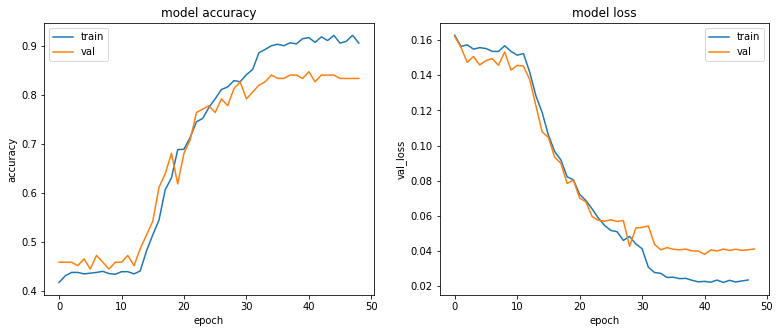

In [ ]:
import matplotlib.pyplot as plt
#graph showing evolution of validation loss/accuracy through epochs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper left')

ax[1].plot(history.history['loss'][1:])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('val_loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper right')

fig.show()

The accuracy of the model on test data:

In [ ]:
#Evaluation of the test loss/accuracy
cnn_model.evaluate(x = X_test,
                   y = y_test,
                   verbose=1)

9/9 [==============================] - 2s 96ms/step - loss: 0.0626 - accuracy: 0.8467


[0.06262828409671783, 0.8467432856559753]

# Prediction

First select a dicom file from test data and convert it to jpg image same as training phase. Then pass it to "predict" function and get output.

After some tests, I set threshold = 0.1 which means if score is greater than 0.1, the related label is in that test image. 

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


['Chest']


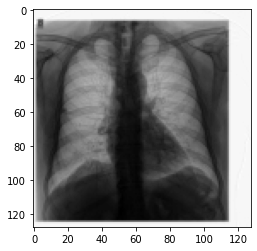

In [ ]:
#prediction of the label(s) using our model by using a random image from the test set
test_candid = test_dcm_path[np.random.randint(0, 743)].dcmread()
dcm_img = test_candid.pixel_array.astype(float)
converted_img = np.uint8((np.maximum(dcm_img,0)/dcm_img.max())*255)
resized_img = cv2.resize(converted_img, dsize=(128,128), interpolation=cv2.INTER_AREA)/255
test_img = np.expand_dims(resized_img, axis=-1)

plt.imshow(resized_img, cmap='gray')

image = np.expand_dims(test_img, axis=0)
prdct_arr = cnn_model.predict(image)

body_parts = []
prdct_arr = prdct_arr.flatten()
for i in range(len(prdct_arr)):
    if (prdct_arr[i] > 0.1):
        body_parts.append(labels[i])

print(body_parts)